# **F20AA Applied Text Analytics: Coursework 1**

https://colab.research.google.com/drive/1FjlLIFB4XJy0YNplJ66l43Hl6I8r5z-B?usp=sharing


## **Twitter Sentimental Analysis** 

### **Installing Packages**


In [ ]:
!pip install vaderSentiment

In [ ]:
!pip install pyLDAvis

In [ ]:
!pip install langdetect

### **Importing Libraries**

In [ ]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
import textblob
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk import ngrams

import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


## **Data Collection**

In [ ]:
#Twitter API Credentials
consumer_key = "OB1KuI4moC50NGqLoG8JTW9W8"
consumer_secret = "4Pg6aIKJ8HUa2naKLLvJ1XdZ2VPFrpP38nDtjGLj0os5eAq3FJ"
access_token = "1483146265168859150-k1AeFB2IQcIf8GjPIZSb62BlVTGj0x"
access_token_secret = "0OSwVMhxD4bKFMG4RpAPzaLnnhcx1sjMSKm8Od2AeSL92"

In [ ]:
#Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

#Setting access token and access token secret
auth.set_access_token(access_token, access_token_secret)

#Creating API object
api = tweepy.API(auth , wait_on_rate_limit=True)

In [ ]:
#Extracting 4000 tweets along with likes, date and time with the help of different keywords related to Expo2020
number_of_tweets = 2000
tweets = []
likes = [] 
time = []

for j in tweepy.Cursor(api.search , tweet_mode = "extended", lang = "en", q = "OpportunityPavilion"+"-filter:retweets").items(number_of_tweets):
  tweets.append(j.full_text)
  likes.append(j.favorite_count)
  time.append(j.created_at)

for k in tweepy.Cursor(api.search , tweet_mode = "extended", lang = "en", q = "MobilityPavilion"+"-filter:retweets").items(number_of_tweets):
  tweets.append(k.full_text)
  likes.append(k.favorite_count)
  time.append(k.created_at)

for i in tweepy.Cursor(api.search , tweet_mode = "extended", lang = "en", q = "SustainabilityPavilion"+"-filter:retweets").items(number_of_tweets):
  tweets.append(i.full_text)
  likes.append(i.favorite_count)
  time.append(i.created_at)

for g in tweepy.Cursor(api.search , tweet_mode = "extended", lang = "en", q = "JubileeStage"+"-filter:retweets").items(number_of_tweets):
  tweets.append(g.full_text)
  likes.append(g.favorite_count)
  time.append(g.created_at)

for b in tweepy.Cursor(api.search , tweet_mode = "extended", lang = "en", q = "Expo2020"+"-filter:retweets").items(number_of_tweets):
  tweets.append(b.full_text)
  likes.append(b.favorite_count)
  time.append(b.created_at)

for c in tweepy.Cursor(api.search , tweet_mode = "extended", lang = "en", q = "ExpoPavilion"+"-filter:retweets").items(number_of_tweets):
  tweets.append(c.full_text)
  likes.append(c.favorite_count)
  time.append(c.created_at)

for a in tweepy.Cursor(api.search , tweet_mode = "extended", lang = "en", q = "Expo2020dubai"+"-filter:retweets").items(number_of_tweets):
  tweets.append(a.full_text)
  likes.append(a.favorite_count)
  time.append(a.created_at)

In [ ]:
#Creating a dataframe with extracted Tweets and related information
df = pd.DataFrame({'Tweets': tweets , 'Likes' : likes, 'Date and Time': time})
df

,Tweets,Likes,Date and Time
0,Piano concert afloat in the air! Wow. \n#Oppor...,0,2022-03-14 09:51:08
1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00
2,‘Expo 2020 Dubai: Shaping the Future’ is a doc...,0,2022-03-07 10:25:01
3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00
4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00
...,...,...,...
4014,@emirates @expo2020dubai @Arsenal @emirates T...,0,2022-03-13 09:54:54
4015,Life Plus provides you all services like\n1. H...,1,2022-03-13 09:54:53
4016,"Indian Actor &amp; Politician, Mr. Krishna Kum...",7,2022-03-13 09:54:29
4017,@emirates @expo2020dubai More than 2000 innoce...,0,2022-03-13 09:53:48


### **Data Pre-Processing**

In [ ]:
#Dropping the duplicates
df = df.drop_duplicates()
df

,Tweets,Likes,Date and Time
0,Piano concert afloat in the air! Wow. \n#Oppor...,0,2022-03-14 09:51:08
1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00
2,‘Expo 2020 Dubai: Shaping the Future’ is a doc...,0,2022-03-07 10:25:01
3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00
4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00
...,...,...,...
4014,@emirates @expo2020dubai @Arsenal @emirates T...,0,2022-03-13 09:54:54
4015,Life Plus provides you all services like\n1. H...,1,2022-03-13 09:54:53
4016,"Indian Actor &amp; Politician, Mr. Krishna Kum...",7,2022-03-13 09:54:29
4017,@emirates @expo2020dubai More than 2000 innoce...,0,2022-03-13 09:53:48


In [ ]:
#Resetting the index after removing duplicate tweets
df = df.reset_index()
df

,index,Tweets,Likes,Date and Time
0,0,Piano concert afloat in the air! Wow. \n#Oppor...,0,2022-03-14 09:51:08
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00
2,2,‘Expo 2020 Dubai: Shaping the Future’ is a doc...,0,2022-03-07 10:25:01
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00
...,...,...,...,...
3736,4014,@emirates @expo2020dubai @Arsenal @emirates T...,0,2022-03-13 09:54:54
3737,4015,Life Plus provides you all services like\n1. H...,1,2022-03-13 09:54:53
3738,4016,"Indian Actor &amp; Politician, Mr. Krishna Kum...",7,2022-03-13 09:54:29
3739,4017,@emirates @expo2020dubai More than 2000 innoce...,0,2022-03-13 09:53:48


In [ ]:
#Displaying Top 3 Most Liked Tweets
mostlike = df.loc[df.Likes.nlargest(3).index]
mostlike

,index,Tweets,Likes,Date and Time
469,469,"What a welcoming!\n\n""It's race week! You guys...",6140,2022-03-14 13:17:47
362,362,Enjoy that? 😁 We certainly did! 🙌 What a day f...,5594,2022-03-14 19:29:51
719,719,Lewis is joining PETRONAS for a live Q&amp;A o...,4578,2022-03-13 16:02:59


### **Data Cleaning**

We create a function that cleans our tweets by removing '@' mentions, links, tags, hashtags, and other unwanted characters in the text.

In [ ]:
#Creating function to Clean the Text
def clean_Txt(tweets):
  #removing any '@' mentions
  tweets = re.sub(r'@[A-Za-z0-9]+', '', tweets)

  #removing hashtags
  tweets = re.sub(r'#','', tweets)

  #removing 'http' links
  tweets = re.sub(r'https?:\/\/\S+', '', tweets)

  #removing '\n' characters
  tweets = tweets.replace('\n', '')

  #removing other unncessary special characters 
  tweets = re.sub('[!"$%&\()*+,-./:@;<=>?[\\]^_`{|}~]', '', tweets)
  return tweets

#Applying the function to our extracted tweets
df['Tweets'] = df['Tweets'].apply(clean_Txt)
df

,index,Tweets,Likes,Date and Time
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00
...,...,...,...,...
3736,4014,The Russian army is destroying my cities ...,0,2022-03-13 09:54:54
3737,4015,Life Plus provides you all services like1 Hous...,1,2022-03-13 09:54:53
3738,4016,Indian Actor amp Politician Mr Krishna Kumar ...,7,2022-03-13 09:54:29
3739,4017,More than 2000 innocent civilians have been ...,0,2022-03-13 09:53:48


In [ ]:
df1 = df
df2 = df

In [ ]:
df1.head()

,index,Tweets,Likes,Date and Time
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00


In [ ]:
df2.head()

,index,Tweets,Likes,Date and Time
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00


## **Data Labelling**

In this section, we perform Data Labelling on our data using **TextBlob** and **VADER Sentiment Analysis**. 

### **Using TextBlob Library**

TextBlob is a Python library for text processing. It offers a basic API for doing standard natural language processing (NLP) activities like part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, and translation, among others.

In [ ]:
#Creating a copy of the dataframe to perform VADER sentiment analysis
textblob_df = df1
textblob_df

,index,Tweets,Likes,Date and Time
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00
...,...,...,...,...
3736,4014,The Russian army is destroying my cities ...,0,2022-03-13 09:54:54
3737,4015,Life Plus provides you all services like1 Hous...,1,2022-03-13 09:54:53
3738,4016,Indian Actor amp Politician Mr Krishna Kumar ...,7,2022-03-13 09:54:29
3739,4017,More than 2000 innocent civilians have been ...,0,2022-03-13 09:53:48


We perform labelling using the sentiment function of TextBlob that returns two properties: **Polarity**, and **Subjectivity**.


> Subjectivity: The degree of personal opinion and factual information in a text is measured by subjectivity. Because of the text's heightened subjectivity, it provides personal opinion rather than factual facts



> Polarity: Polarity values lies in the range of -1 and 1.
  Where,
  -1 defines a negative sentiment, 0 defines a neutral sentiment, and 1 defines a positive sentiment.




In [ ]:
#Creating a function to get Subjectivity using TextBlob
def Subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Creating a function to get Polarity using TextBlob
def Polarity(text):
  return TextBlob(text).sentiment.polarity


In [ ]:
#Finding subjectivity and polarity of the extracted tweets
textblob_df['Subjectivity'] = textblob_df['Tweets'].apply(Subjectivity)
textblob_df['Polarity'] = textblob_df['Tweets'].apply(Polarity)
textblob_df

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08,0.550000,0.050000
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00,0.833333,0.450000
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01,0.239583,0.141667
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00,0.666667,0.000000
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00,0.454545,0.136364
...,...,...,...,...,...,...
3736,4014,The Russian army is destroying my cities ...,0,2022-03-13 09:54:54,0.166667,-0.225000
3737,4015,Life Plus provides you all services like1 Hous...,1,2022-03-13 09:54:53,0.000000,0.000000
3738,4016,Indian Actor amp Politician Mr Krishna Kumar ...,7,2022-03-13 09:54:29,0.000000,0.000000
3739,4017,More than 2000 innocent civilians have been ...,0,2022-03-13 09:53:48,0.240000,0.160000


In [ ]:
#Computing negative, positive, and neutral analysis based on Polarity
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

textblob_df['Analysis'] = textblob_df['Polarity'].apply(getAnalysis)
textblob_df

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08,0.550000,0.050000,Positive
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00,0.833333,0.450000,Positive
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01,0.239583,0.141667,Positive
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00,0.666667,0.000000,Neutral
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00,0.454545,0.136364,Positive
...,...,...,...,...,...,...,...
3736,4014,The Russian army is destroying my cities ...,0,2022-03-13 09:54:54,0.166667,-0.225000,Negative
3737,4015,Life Plus provides you all services like1 Hous...,1,2022-03-13 09:54:53,0.000000,0.000000,Neutral
3738,4016,Indian Actor amp Politician Mr Krishna Kumar ...,7,2022-03-13 09:54:29,0.000000,0.000000,Neutral
3739,4017,More than 2000 innocent civilians have been ...,0,2022-03-13 09:53:48,0.240000,0.160000,Positive


In [ ]:
#Sorting the dataframe in descending order of Polarity to get the top 5-10 positive, negative and neutral tweets
sortDF = textblob_df.sort_values(by=['Polarity'], ascending = False)
sortDF.head()

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis
973,976,Best country I’ve seen in the Expo2020 yet ❤️,2,2022-03-12 15:20:30,0.3,1.0,Positive
3156,3391,The legend👏 OPM is the best,3,2022-03-13 19:48:05,0.3,1.0,Positive
2701,2879,What an honor being part of the best marketing...,9,2022-03-14 12:57:32,0.3,1.0,Positive
2674,2844,Motorsports Thank you guys that was an awe...,0,2022-03-14 13:19:55,1.0,1.0,Positive
1520,1523,The Countdown Has Just BegunRealtors is coming...,4,2022-03-10 11:14:50,0.3,1.0,Positive


In [ ]:
#Displaying Top-10 'Positive' tweets:
positiveDF = sortDF.loc[textblob_df['Analysis'] == 'Positive']
positiveDF.head(10)

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis
973,976,Best country I’ve seen in the Expo2020 yet ❤️,2,2022-03-12 15:20:30,0.3,1.0,Positive
3156,3391,The legend👏 OPM is the best,3,2022-03-13 19:48:05,0.3,1.0,Positive
2701,2879,What an honor being part of the best marketing...,9,2022-03-14 12:57:32,0.3,1.0,Positive
2674,2844,Motorsports Thank you guys that was an awe...,0,2022-03-14 13:19:55,1.0,1.0,Positive
1520,1523,The Countdown Has Just BegunRealtors is coming...,4,2022-03-10 11:14:50,0.3,1.0,Positive
2038,2043,Congrats and Best Wishes 👏,0,2022-03-15 16:48:50,0.3,1.0,Positive
686,686,Expo2020 Marvelous Moroccan Representation 🇲🇦❤️,2,2022-03-13 18:35:25,1.0,1.0,Positive
2583,2727,The best👍💯 of the best DUBAI,0,2022-03-14 16:06:14,0.3,1.0,Positive
670,670,TheBatman GOTHAM CITY PAVILLION is fucking awe...,6,2022-03-13 20:33:40,1.0,1.0,Positive
2510,2644,Motorsports Awesome 😁💜👏🏼,0,2022-03-14 17:59:27,1.0,1.0,Positive


In [ ]:
#Displaying Top-10 'Negative' tweets:
negativeDF = sortDF.loc[textblob_df['Analysis'] == 'Negative']
negativeDF.head(10)

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis
1585,1588,Agritech solutions are a key component in achi...,10,2022-03-10 08:51:37,0.348687,-0.003838,Negative
2705,2883,A group of young people from Azerbaijan visite...,11,2022-03-14 12:54:01,0.318750,-0.006250,Negative
2340,2412,Expo2020Dubai reports 16 million visits in a w...,1,2022-03-15 07:45:39,0.750000,-0.006250,Negative
1544,1547,Ghana is today the safest country in West Afri...,14,2022-03-10 10:03:07,0.175000,-0.008333,Negative
1724,1727,Ghana is today the safest country in West Afri...,5,2022-03-10 07:27:57,0.175000,-0.008333,Negative


In [ ]:
#Displaying Top-10 'Neutral' tweets:
neutralDF = sortDF.loc[textblob_df['Analysis'] == 'Neutral']
neutralDF.head(10)

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis
604,604,Today’s business highlight at Expo 2020 Dubai ...,0,2022-03-14 06:29:41,0.0625,0.0,Neutral
3051,3274,You are still to accept Daddyhope's debate ...,11,2022-03-14 05:23:58,0.0000,0.0,Neutral
600,600,Celebrating Zimbabwe's National Day at the Exp...,2,2022-03-14 06:38:58,0.0000,0.0,Neutral
612,612,Tune in It is starting now Opening Session Kno...,4,2022-03-14 06:12:09,0.1000,0.0,Neutral
3052,3275,Those with nothing to do,1,2022-03-14 05:23:21,0.0000,0.0,Neutral
610,610,UN 17 sustainable goals amp the flags of almos...,0,2022-03-14 06:15:11,0.0000,0.0,Neutral
3054,3278,Today is Zimbabwe Day at the and President i...,26,2022-03-14 05:19:38,0.0000,0.0,Neutral
3057,3282,Congratulations Amaan ☺️💐💐,1,2022-03-14 05:03:09,0.0000,0.0,Neutral
613,613,Register for COACHING Now 👇📲Call us on 04 554...,1,2022-03-14 06:10:00,0.0000,0.0,Neutral
609,609,With Expo 2020 now nearing an end we may see a...,0,2022-03-14 06:15:40,0.0000,0.0,Neutral


In [ ]:
#Displaying final dataframe with data labels like: subjectivity, polarity and analysis created using TextBlob
textblob_df

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08,0.550000,0.050000,Positive
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00,0.833333,0.450000,Positive
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01,0.239583,0.141667,Positive
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00,0.666667,0.000000,Neutral
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00,0.454545,0.136364,Positive
...,...,...,...,...,...,...,...
3736,4014,The Russian army is destroying my cities ...,0,2022-03-13 09:54:54,0.166667,-0.225000,Negative
3737,4015,Life Plus provides you all services like1 Hous...,1,2022-03-13 09:54:53,0.000000,0.000000,Neutral
3738,4016,Indian Actor amp Politician Mr Krishna Kumar ...,7,2022-03-13 09:54:29,0.000000,0.000000,Neutral
3739,4017,More than 2000 innocent civilians have been ...,0,2022-03-13 09:53:48,0.240000,0.160000,Positive


### **Using VADER Sentiment Analysis**

VADER (Valence Aware Dictionary for Sentiment Reasoning) model uses both polarity and intensity to determine the sentiment of a text. VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary with four types of scores:

*   Positive 
*   Negative
*   Neutral
*   Compoud (Computed by summing positive, negative and neutral scores and normalizing it between 1 and -1. Here, 1 denotes an extremely positive tweet, and -1 denotes an extremely negative tweet.)


In [ ]:
#Creating a copy of the dataframe to perform VADER sentiment analysis
vader_df = df2
vader_df

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08,0.550000,0.050000,Positive
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00,0.833333,0.450000,Positive
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01,0.239583,0.141667,Positive
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00,0.666667,0.000000,Neutral
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00,0.454545,0.136364,Positive
...,...,...,...,...,...,...,...
3736,4014,The Russian army is destroying my cities ...,0,2022-03-13 09:54:54,0.166667,-0.225000,Negative
3737,4015,Life Plus provides you all services like1 Hous...,1,2022-03-13 09:54:53,0.000000,0.000000,Neutral
3738,4016,Indian Actor amp Politician Mr Krishna Kumar ...,7,2022-03-13 09:54:29,0.000000,0.000000,Neutral
3739,4017,More than 2000 innocent civilians have been ...,0,2022-03-13 09:53:48,0.240000,0.160000,Positive


In [ ]:
#Creating a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

In [ ]:
#Creating scores list to store scores of four categories: Positive, Negative, Neutral, and Compound
scores = []

# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(vader_df['Tweets'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(vader_df['Tweets'][i])["compound"]
    pos = analyzer.polarity_scores(vader_df['Tweets'][i])["pos"]
    neu = analyzer.polarity_scores(vader_df['Tweets'][i])["neu"]
    neg = analyzer.polarity_scores(vader_df['Tweets'][i])["neg"]
    
    scores.append({    "Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
#Displaying scores extracted from VADER's SentimentIntensityAnalyzer() in the dataframe:
sentiments_score = pd.DataFrame.from_dict(scores)
vader_df = vader_df.join(sentiments_score)
vader_df

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis,Compound,Positive,Negative,Neutral
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08,0.550000,0.050000,Positive,0.5859,0.322,0.000,0.678
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00,0.833333,0.450000,Positive,0.6705,0.259,0.085,0.656
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01,0.239583,0.141667,Positive,0.4939,0.094,0.000,0.906
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00,0.666667,0.000000,Neutral,0.0000,0.000,0.000,1.000
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00,0.454545,0.136364,Positive,0.4215,0.104,0.000,0.896
...,...,...,...,...,...,...,...,...,...,...,...
3736,4014,The Russian army is destroying my cities ...,0,2022-03-13 09:54:54,0.166667,-0.225000,Negative,-0.9578,0.041,0.364,0.595
3737,4015,Life Plus provides you all services like1 Hous...,1,2022-03-13 09:54:53,0.000000,0.000000,Neutral,0.0000,0.000,0.000,1.000
3738,4016,Indian Actor amp Politician Mr Krishna Kumar ...,7,2022-03-13 09:54:29,0.000000,0.000000,Neutral,0.0000,0.000,0.000,1.000
3739,4017,More than 2000 innocent civilians have been ...,0,2022-03-13 09:53:48,0.240000,0.160000,Positive,-0.6563,0.067,0.177,0.756


In [ ]:
#Computing negative, positive, and neutral analysis based on Polarity
def getVaderAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

vader_df['Vader_Analysis'] = vader_df['Compound'].apply(getVaderAnalysis)
vader_df

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis,Compound,Positive,Negative,Neutral,Vader_Analysis
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08,0.550000,0.050000,Positive,0.5859,0.322,0.000,0.678,Positive
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00,0.833333,0.450000,Positive,0.6705,0.259,0.085,0.656,Positive
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01,0.239583,0.141667,Positive,0.4939,0.094,0.000,0.906,Positive
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00,0.666667,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00,0.454545,0.136364,Positive,0.4215,0.104,0.000,0.896,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
3736,4014,The Russian army is destroying my cities ...,0,2022-03-13 09:54:54,0.166667,-0.225000,Negative,-0.9578,0.041,0.364,0.595,Negative
3737,4015,Life Plus provides you all services like1 Hous...,1,2022-03-13 09:54:53,0.000000,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral
3738,4016,Indian Actor amp Politician Mr Krishna Kumar ...,7,2022-03-13 09:54:29,0.000000,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral
3739,4017,More than 2000 innocent civilians have been ...,0,2022-03-13 09:53:48,0.240000,0.160000,Positive,-0.6563,0.067,0.177,0.756,Negative


In [ ]:
vader_df['Vader_Analysis'].value_counts()

Positive    2027
Neutral     1080
Negative     634
Name: Vader_Analysis, dtype: int64

In [ ]:
textblob_df['Analysis'].value_counts()

Positive    1895
Neutral     1520
Negative     326
Name: Analysis, dtype: int64

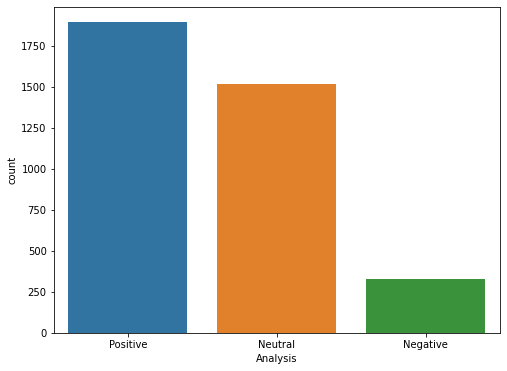

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data= textblob_df, x='Analysis', order= textblob_df['Analysis'].value_counts().index)
plt.show()

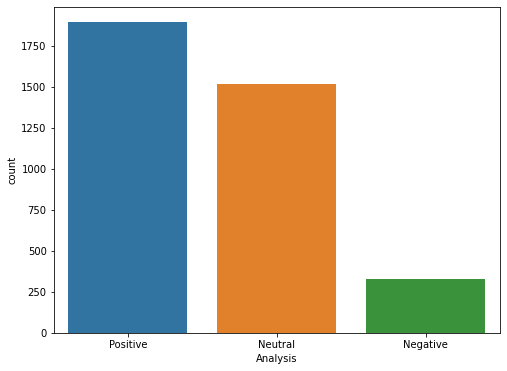

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data= vader_df, x='Analysis', order= vader_df['Vader_Analysis'].value_counts().index)
plt.show()

In [ ]:
Df = vader_df
Df.head()

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis,Compound,Positive,Negative,Neutral,Vader_Analysis
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08,0.550000,0.050000,Positive,0.5859,0.322,0.000,0.678,Positive
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00,0.833333,0.450000,Positive,0.6705,0.259,0.085,0.656,Positive
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01,0.239583,0.141667,Positive,0.4939,0.094,0.000,0.906,Positive
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00,0.666667,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00,0.454545,0.136364,Positive,0.4215,0.104,0.000,0.896,Positive


**Summary on Text Pre-processing**: VADER and TextBlob are both lexicon and rule-based libraries to perform sentiment analysis.

From the above graphs we can analyze that both TextBlob and VADER give similar results. However, TextBlob has less accuracy while identifying negative tweets as compared to VADER. 

Due to this reason, the classifiers implemented in the sections below use the results from VADER analysis. 

## **Text Analytics Pipeline On Tweets**

### **Text Processing**

In [ ]:
#Creating a function to perform text processing techniques such as: Tokenization, Stop Words Removal, Stemming, and Lemmatization
def text_processing(t):
    #Tokenization
    tokens = []
    tokens = word_tokenize(t)

    #Removing Stop words
    stpwrds = set(stopwords.words('english'))
    filtert = ' '.join(i for i in tokens if i not in stpwrds)
    
    #Stemming
    stem = SnowballStemmer(language='english')
    stoken = []
    stoken = word_tokenize(filtert)
    stemt = ' '.join(stem.stem(i) for i in stoken)
    
    #Lemmatization
    lem = WordNetLemmatizer()
    sttoken = []
    sttoken = word_tokenize(stemt)
    lemt = ' '.join(lem.lemmatize(i,'v') for i in sttoken)
  
    return lemt

In [ ]:
#Applying text processing techniques on the tweets
Df['Clean Tweets'] = Df['Tweets'].apply(text_processing)
Df

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis,Compound,Positive,Negative,Neutral,Vader_Analysis,Clean Tweets
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08,0.550000,0.050000,Positive,0.5859,0.322,0.000,0.678,Positive,piano concert afloat air wow opportunitypavili...
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00,0.833333,0.450000,Positive,0.6705,0.259,0.085,0.656,Positive,search opportun pavilion see beauti piano conc...
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01,0.239583,0.141667,Positive,0.4939,0.094,0.000,0.906,Positive,‘ expo 2020 dubai shape futur ’ documentari co...
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00,0.666667,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral,have ride world ’ largest passeng lift mobil p...
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00,0.454545,0.136364,Positive,0.4215,0.104,0.000,0.896,Positive,do know mobil pavilion name alif 1st letter ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,4014,The Russian army is destroying my cities ...,0,2022-03-13 09:54:54,0.166667,-0.225000,Negative,-0.9578,0.041,0.364,0.595,Negative,the russian armi destroy citi kill peopl pleas...
3737,4015,Life Plus provides you all services like1 Hous...,1,2022-03-13 09:54:53,0.000000,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral,life plus provid servic like1 housemaid2 nurse...
3738,4016,Indian Actor amp Politician Mr Krishna Kumar ...,7,2022-03-13 09:54:29,0.000000,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral,indian actor amp politician mr krishna kumar m...
3739,4017,More than 2000 innocent civilians have been ...,0,2022-03-13 09:53:48,0.240000,0.160000,Positive,-0.6563,0.067,0.177,0.756,Negative,more 2000 innoc civilian kill sinc russian inv...


### **Feature Representation Using N-grams**


In [ ]:
def get_ngrams(tweets, analysis,  n_gram, top_n=None):
    text = [word for sent in tweets[tweets['Vader_Analysis'] == analysis]['Clean Tweets'] for word in sent.split()]
    N_grams = ngrams(text, n_gram)
    N_grams = (' '.join(g) for g in N_grams)
    Num_of_grams = [words for words in N_grams]
    freqwords = Counter(Num_of_grams)
    sorted_freqwords= sorted(freqwords.items(), key=lambda pair: pair[1], reverse=True)
    freqwords_df = pd.DataFrame(sorted_freqwords[:top_n], columns=['Words', 'Count'])
    return freqwords_df[:top_n]

**Uni-grams**

In [ ]:
# Uni-gram for positive analysis
pos_unigram = get_ngrams(Df, 'Positive', 1, 10)
print(pos_unigram.head(10))

           Words  Count
0       expo2020    999
1          dubai    788
2           expo    389
3              ’    378
4  expo2020dubai    314
5             's    274
6       pavilion    273
7           2020    242
8            uae    240
9            the    222


In [ ]:
# Uni-gram for neutral analysis
neu_unigram = get_ngrams(Df, 'Neutral', 1, 10)
print(neu_unigram.head(10))

           Words  Count
0       expo2020    523
1          dubai    434
2  expo2020dubai    209
3           expo    165
4              ’    135
5            uae    124
6           2020    121
7       pavilion    119
8          visit    111
9            day    110


In [ ]:
# Uni-gram for negative analysis
neg_unigram = get_ngrams(Df, 'Negative', 1, 10)
print(neg_unigram.head(10))

        Words  Count
0      cooper    482
1      russia    436
2        stop    376
3     russian    361
4   aggressor    306
5        armi    234
6  stoprussia    225
7      ukrain    208
8      financ    195
9     stopwar    157


**Bi-grams**

In [ ]:
# Bi-gram for positive analysis
pos_bigram = get_ngrams(Df, 'Positive', 2, 10)
print(pos_bigram.head(10))

                        Words  Count
0              expo2020 dubai    220
1                   expo 2020    216
2                  2020 dubai    130
3  expo2020 togetherforgrowth    122
4            presid akufoaddo    106
5          akufoaddo expo2020    105
6                   dubai uae     56
7                  nation day     51
8                   12 presid     51
9                     join us     49


In [ ]:
# Bi-gram for neutral analysis
neu_bigram = get_ngrams(Df, 'Neutral', 2, 10)
print(neu_bigram.head(10))

                          Words  Count
0                     expo 2020    120
1                expo2020 dubai    101
2                    2020 dubai     62
3        expo2020dubai expo2020     44
4                    march 2022     38
5                     dubai uae     37
6    cryptotrad dubaicryptoexpo     33
7  dubaicryptoexpo 100daysofcod     33
8                dubai abudhabi     33
9       cryptonew newcryptocurr     33


In [ ]:
# Bi-gram for negative analysis
neg_bigram = get_ngrams(Df, 'Negative', 2, 10)
print(neg_bigram.head(10))

                Words  Count
0         stop cooper    249
1       cooper russia    226
2    cooper aggressor    220
3        russian armi    174
4      financ russian    164
5         ukrain stop    134
6  stopwar stoprussia    134
7       russian invas    129
8        invas ukrain    127
9        while cooper    127


**Tri-grams**

In [ ]:
# Tri-gram for positive analysis
pos_trigram = get_ngrams(Df, 'Positive', 3, 10)
print(pos_trigram.head(10))

                                  Words  Count
0                       expo 2020 dubai    129
1             presid akufoaddo expo2020    105
2  akufoaddo expo2020 togetherforgrowth    100
3                   12 presid akufoaddo     51
4          expo2020 togetherforgrowth “     38
5                togetherforgrowth “ we     38
6                            do miss mr     33
7                           miss mr rtr     33
8                             mr rtr 's     33
9                         rtr 's speech     33


In [ ]:
# Tri-gram for neutral analysis
neu_trigram = get_ngrams(Df, 'Neutral', 3, 10)
print(neu_trigram.head(10))

                                        Words  Count
0                             expo 2020 dubai     62
1     cryptotrad dubaicryptoexpo 100daysofcod     33
2           cryptonew newcryptocurr dubaiexpo     33
3                    dubai abudhabi cryptonew     32
4            abudhabi cryptonew newcryptocurr     32
5       newcryptocurr dubaiexpo expo2020dubai     32
6            dubaiexpo expo2020dubai expo2020     31
7         expo2020dubai expo2020 passiveincom     31
8  dubaicryptoexpo 100daysofcod airdropcrypto     30
9               expo2020 passiveincom bdcapit     30


In [ ]:
# Tri-gram for neutral analysis
neg_trigram = get_ngrams(Df, 'Negative', 3, 10)
print(neg_trigram.head(10))

                    Words  Count
0   stop cooper aggressor    204
1     financ russian armi    159
2    russian invas ukrain    127
3     while cooper russia    127
4      ukrain stop cooper    126
5      sinc russian invas    125
6  aggressor while cooper    125
7         cooper russia –    124
8         russia – financ    124
9        – financ russian    124


### **Vectorization of Tweets**

######Creating function to convert our texts into a vector format, which is then assigned to X. X is considered as the features used to train our machine learning models. We use the TF-IDF Vectorizer function to perform this task.

In [ ]:
#Vectorization using unigram features
def unigrams_feature_vector(data):
    # Defining the vector
    vector = TfidfVectorizer(sublinear_tf=True)

    # Fitting the data into the vector      
    vector.fit_transform(data) 

    # Returning the vector as function call                 
    return vector                                    

X = unigrams_feature_vector(np.array(Df["Clean Tweets"]).ravel())

In [ ]:
#Vectorization using bigram features
def bigrams_feature_vector(data):
    # Defining the vector
    vector = TfidfVectorizer(sublinear_tf=True, ngram_range = (2,2))

    # Fitting the data into the vector      
    vector.fit_transform(data)    

    # Returning the vector as function call                        
    return vector                                    

X1 = bigrams_feature_vector(np.array(Df["Clean Tweets"]).ravel())

In [ ]:
#Vectorization using trigram features
def trigrams_feature_vector(data):
    # Defining the vector
    vector = TfidfVectorizer(sublinear_tf=True, ngram_range = (3,3))

    # Fitting the data into the vector
    vector.fit_transform(data)

    # Returning the vector as function call                            
    return vector                                    

X2 = trigrams_feature_vector(np.array(Df["Clean Tweets"]).ravel())

In [ ]:
#Transforms unigram vectors to a numpy array
X = X.transform(np.array(Df["Clean Tweets"]).ravel())
print(X)

  (0, 8732)	0.36897752909820214
  (0, 6120)	0.42083729591874386
  (0, 5836)	0.44378560831446834
  (0, 3018)	0.16440500581248818
  (0, 1916)	0.2954413573930986
  (0, 677)	0.37707667942775863
  (0, 615)	0.48301600747241985
  (1, 8147)	0.15701216431876944
  (1, 7020)	0.19152481376915925
  (1, 7001)	0.3606453875589703
  (1, 6120)	0.3520139925527095
  (1, 6001)	0.15500266990310624
  (1, 5836)	0.3712093612785972
  (1, 5831)	0.21138980616745193
  (1, 4964)	0.30863531925452303
  (1, 3317)	0.3848286921312691
  (1, 3010)	0.0863371308262564
  (1, 2518)	0.10612726937248583
  (1, 1916)	0.24712517828081718
  (1, 1200)	0.23570817960269977
  (1, 677)	0.31540994277634665
  (2, 7102)	0.22621100524241755
  (2, 6430)	0.27008312864473
  (2, 5836)	0.24814706694357377
  (2, 5521)	0.27008312864473
  :	:
  (3739, 171)	0.2795707392633572
  (3740, 8547)	0.14014109902367744
  (3740, 8302)	0.13928227748400204
  (3740, 8202)	0.4193317775009068
  (3740, 7519)	0.12176010434586261
  (3740, 7490)	0.20732058450097796
  

In [ ]:
#Transforms bigram vectors to a numpy array
X1 = X1.transform(np.array(Df["Clean Tweets"]).ravel())
print(X1)

  (0, 31183)	0.411441246641404
  (0, 21227)	0.39189348401171026
  (0, 20070)	0.411441246641404
  (0, 5830)	0.411441246641404
  (0, 1586)	0.411441246641404
  (0, 1325)	0.411441246641404
  (1, 28510)	0.30126968350066063
  (1, 24043)	0.2768006602072753
  (1, 23957)	0.30126968350066063
  (1, 21227)	0.2869562224447577
  (1, 20783)	0.2869562224447577
  (1, 20041)	0.2869562224447577
  (1, 17092)	0.30126968350066063
  (1, 11367)	0.30126968350066063
  (1, 10107)	0.11894582524130344
  (1, 8283)	0.16388321753940543
  (1, 5855)	0.30126968350066063
  (1, 3416)	0.30126968350066063
  (1, 1578)	0.30126968350066063
  (2, 24420)	0.2233607213693317
  (2, 22366)	0.23450202006465368
  (2, 20069)	0.23450202006465368
  (2, 18908)	0.23450202006465368
  (2, 17117)	0.23450202006465368
  (2, 15301)	0.23450202006465368
  :	:
  (3740, 28713)	0.20426774909357168
  (3740, 28711)	0.20426774909357168
  (3740, 28706)	0.15769216300781694
  (3740, 25841)	0.08841598563500978
  (3740, 25699)	0.20426774909357168
  (3740, 23

In [ ]:
#Transforms trigram vectors to a numpy array
X2 = X2.transform(np.array(Df["Clean Tweets"]).ravel())
print(X2)

  (0, 34313)	0.44721359549995787
  (0, 23410)	0.44721359549995787
  (0, 6385)	0.44721359549995787
  (0, 1849)	0.44721359549995787
  (0, 1577)	0.44721359549995787
  (1, 26400)	0.2946662144509949
  (1, 26305)	0.2946662144509949
  (1, 23411)	0.2946662144509949
  (1, 22897)	0.2946662144509949
  (1, 22065)	0.2946662144509949
  (1, 18819)	0.2946662144509949
  (1, 12686)	0.2946662144509949
  (1, 11349)	0.2118727039340443
  (1, 9240)	0.2946662144509949
  (1, 6413)	0.2946662144509949
  (1, 3808)	0.2946662144509949
  (1, 1841)	0.2946662144509949
  (2, 26801)	0.2343266523955593
  (2, 24603)	0.2343266523955593
  (2, 22095)	0.2343266523955593
  (2, 20812)	0.2343266523955593
  (2, 18845)	0.2343266523955593
  (2, 16838)	0.2343266523955593
  (2, 16372)	0.2343266523955593
  (2, 13248)	0.2343266523955593
  :	:
  (3740, 31506)	0.19567808877819634
  (3740, 31498)	0.19567808877819634
  (3740, 31496)	0.19567808877819634
  (3740, 31484)	0.19567808877819634
  (3740, 28315)	0.08952171832558693
  (3740, 28147)	

In [ ]:
X.shape

(3741, 8967)

In [ ]:
X1.shape

(3741, 31736)

In [ ]:
X2.shape

(3741, 34882)

######Converting 'Positive', 'Negative' and 'Neutral' analysis to 1, -1, and 0 respectively. This is then assigned to Y because 'Analysis' is considered as an output variable for training and testing our ML models.

In [ ]:
#Creating a new column with converted analysis labels into a number format (0, 1, and -1):
Df['Labeled_Analysis'] = Df.Vader_Analysis.map({'Negative': -1,'Positive': 1,'Neutral': 0})

In [ ]:
Df

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis,Compound,Positive,Negative,Neutral,Vader_Analysis,Clean Tweets,Labeled_Analysis
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08,0.550000,0.050000,Positive,0.5859,0.322,0.000,0.678,Positive,piano concert afloat air wow opportunitypavili...,1
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00,0.833333,0.450000,Positive,0.6705,0.259,0.085,0.656,Positive,search opportun pavilion see beauti piano conc...,1
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01,0.239583,0.141667,Positive,0.4939,0.094,0.000,0.906,Positive,‘ expo 2020 dubai shape futur ’ documentari co...,1
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00,0.666667,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral,have ride world ’ largest passeng lift mobil p...,0
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00,0.454545,0.136364,Positive,0.4215,0.104,0.000,0.896,Positive,do know mobil pavilion name alif 1st letter ar...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,4014,The Russian army is destroying my cities ...,0,2022-03-13 09:54:54,0.166667,-0.225000,Negative,-0.9578,0.041,0.364,0.595,Negative,the russian armi destroy citi kill peopl pleas...,-1
3737,4015,Life Plus provides you all services like1 Hous...,1,2022-03-13 09:54:53,0.000000,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral,life plus provid servic like1 housemaid2 nurse...,0
3738,4016,Indian Actor amp Politician Mr Krishna Kumar ...,7,2022-03-13 09:54:29,0.000000,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral,indian actor amp politician mr krishna kumar m...,0
3739,4017,More than 2000 innocent civilians have been ...,0,2022-03-13 09:53:48,0.240000,0.160000,Positive,-0.6563,0.067,0.177,0.756,Negative,more 2000 innoc civilian kill sinc russian inv...,-1


In [ ]:
#Assigning the column to Y:
Y = Df['Labeled_Analysis']

##**Implementing Classifiers**

In this section, we will be implementing different types of classifiers, such as: Logistic Regression, Naive Bayes, and Support Vector Machine. 

These classifiers are also implemented to compare their performance on different n-grams.

### **Unigrams**

In [ ]:
#Splitting data into training and testing sets (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
X_train

<2992x8967 sparse matrix of type '<class 'numpy.float64'>'
	with 44039 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train)

  (0, 8736)	0.24730162510042317
  (0, 8647)	0.24730162510042317
  (0, 8628)	0.24730162510042317
  (0, 8627)	0.220749700498253
  (0, 8339)	0.18704435837420402
  (0, 8282)	0.20371704190448953
  (0, 8147)	0.09610656185720218
  (0, 7840)	0.09908123492098829
  (0, 7779)	0.16122608359005186
  (0, 6797)	0.24730162510042317
  (0, 5845)	0.24730162510042317
  (0, 4729)	0.14972540624232128
  (0, 3658)	0.24730162510042317
  (0, 3361)	0.2272158695250168
  (0, 3216)	0.1660669133683783
  (0, 3079)	0.24730162510042317
  (0, 1525)	0.14972540624232128
  (0, 1431)	0.15022937755308788
  (0, 1121)	0.15707936172691295
  (0, 967)	0.2272158695250168
  (0, 753)	0.19306125297572188
  (0, 534)	0.24730162510042317
  (0, 515)	0.13831099755003434
  (0, 464)	0.24730162510042317
  (1, 7983)	0.23331148318347675
  :	:
  (2989, 5932)	0.27252256638116895
  (2989, 5792)	0.29741404048988834
  (2989, 4986)	0.17804808607474523
  (2989, 4156)	0.2655959238242944
  (2989, 3863)	0.2951382225207048
  (2989, 3701)	0.22740417923933

### Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = LR.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,Y_pred))

0.822429906542056


In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.98      0.71      0.82       142
           0       0.86      0.66      0.75       215
           1       0.78      0.95      0.86       392

    accuracy                           0.82       749
   macro avg       0.87      0.77      0.81       749
weighted avg       0.84      0.82      0.82       749



### Bernoulli Naive Bayes

In [ ]:
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)

BernoulliNB()

In [ ]:
Y_pred1 = BNB.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,Y_pred1))

0.7837116154873164


In [ ]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

          -1       0.95      0.74      0.83       142
           0       0.74      0.61      0.67       215
           1       0.76      0.89      0.82       392

    accuracy                           0.78       749
   macro avg       0.82      0.75      0.78       749
weighted avg       0.79      0.78      0.78       749



### Mutinomial Naive Bayes

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
Y_pred2 =   MNB.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,Y_pred2))

0.7383177570093458


In [ ]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

          -1       0.95      0.73      0.82       142
           0       0.90      0.32      0.47       215
           1       0.68      0.97      0.80       392

    accuracy                           0.74       749
   macro avg       0.84      0.67      0.70       749
weighted avg       0.79      0.74      0.71       749



### Support Vector Machine

In [ ]:
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
Y_pred3 =   SVM.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,Y_pred3))

0.829105473965287


In [ ]:
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

          -1       0.95      0.75      0.84       142
           0       0.76      0.79      0.78       215
           1       0.83      0.88      0.86       392

    accuracy                           0.83       749
   macro avg       0.85      0.81      0.82       749
weighted avg       0.83      0.83      0.83       749



Given below are the evaluation scores obtained by training the dataset with four different classifiers – Logistic Regression, Multinomial Naïve Bayes Classifier, Bernoulli Naïve Bayes Classifier and Support Vector Machine(SVM).
The results achieved by these classifiers with unigrams as a feature are as follows:


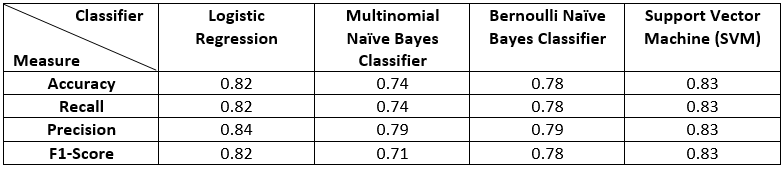

Among the three classifiers, SVM gave the best results, giving the highest scores for accuracy, recall and f1-score. The Logistic Regression classifier gave the highest precision.  


## **Bigrams**

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size = 0.20, random_state = 0)

In [ ]:
print(X1_train)

  (0, 31193)	0.20965054602711655
  (0, 30675)	0.20965054602711655
  (0, 30594)	0.20965054602711655
  (0, 30593)	0.20965054602711655
  (0, 29189)	0.20965054602711655
  (0, 28919)	0.20965054602711655
  (0, 28403)	0.19262279854652006
  (0, 27169)	0.19968995227921849
  (0, 26741)	0.20965054602711655
  (0, 23391)	0.20965054602711655
  (0, 20088)	0.20965054602711655
  (0, 16128)	0.20965054602711655
  (0, 12660)	0.20965054602711655
  (0, 11524)	0.20965054602711655
  (0, 11000)	0.20965054602711655
  (0, 4469)	0.20965054602711655
  (0, 4136)	0.20965054602711655
  (0, 3129)	0.20965054602711655
  (0, 2671)	0.20965054602711655
  (0, 1802)	0.20965054602711655
  (0, 1084)	0.20965054602711655
  (0, 1043)	0.20965054602711655
  (0, 930)	0.20965054602711655
  (1, 27815)	0.27477664447952715
  (1, 24837)	0.27477664447952715
  :	:
  (2989, 21677)	0.23720897730112753
  (2989, 20325)	0.23720897730112753
  (2989, 19815)	0.23720897730112753
  (2989, 19801)	0.23720897730112753
  (2989, 17154)	0.2372089773011275

### Logistic Regression

In [ ]:
LR1 = LogisticRegression()
LR1.fit(X1_train, Y1_train)

LogisticRegression()

In [ ]:
Y1_pred = LR1.predict(X1_test)

In [ ]:
print(accuracy_score(Y1_test,Y1_pred))

0.69826435246996


In [ ]:
print(classification_report(Y1_test,Y1_pred))

              precision    recall  f1-score   support

          -1       1.00      0.56      0.72       142
           0       0.89      0.27      0.41       215
           1       0.64      0.98      0.77       392

    accuracy                           0.70       749
   macro avg       0.84      0.60      0.63       749
weighted avg       0.78      0.70      0.66       749



### Bernoulli Naive Bayes

In [ ]:
BNB1 = BernoulliNB()
BNB1.fit(X1_train, Y1_train)

BernoulliNB()

In [ ]:
Y1_pred1 = BNB1.predict(X1_test)

In [ ]:
print(accuracy_score(Y1_test,Y1_pred1))

0.6034712950600801


In [ ]:
print(classification_report(Y1_test,Y1_pred1))

              precision    recall  f1-score   support

          -1       1.00      0.43      0.60       142
           0       0.44      0.25      0.32       215
           1       0.60      0.86      0.70       392

    accuracy                           0.60       749
   macro avg       0.68      0.51      0.54       749
weighted avg       0.63      0.60      0.57       749



### Multinomial Naive Bayes

In [ ]:
MNB1 = MultinomialNB()
MNB1.fit(X1_train, Y1_train)

MultinomialNB()

In [ ]:
Y1_pred2 =   MNB1.predict(X1_test)

In [ ]:
print(accuracy_score(Y1_test,Y1_pred2))

0.7089452603471295


In [ ]:
print(classification_report(Y1_test,Y1_pred2))

              precision    recall  f1-score   support

          -1       0.99      0.70      0.82       142
           0       0.75      0.27      0.39       215
           1       0.65      0.96      0.78       392

    accuracy                           0.71       749
   macro avg       0.80      0.64      0.66       749
weighted avg       0.75      0.71      0.67       749



### Support vector Machine

In [ ]:
SVM1 = SVC(kernel='linear')
SVM1.fit(X1_train, Y1_train)

SVC(kernel='linear')

In [ ]:
Y1_pred3 =   SVM1.predict(X1_test)

In [ ]:
print(accuracy_score(Y1_test,Y1_pred3))

0.7236315086782377


In [ ]:
print(classification_report(Y1_test,Y1_pred3))

              precision    recall  f1-score   support

          -1       0.99      0.68      0.81       142
           0       0.82      0.30      0.44       215
           1       0.66      0.97      0.79       392

    accuracy                           0.72       749
   macro avg       0.83      0.65      0.68       749
weighted avg       0.77      0.72      0.69       749



The results achieved by these classifiers with bigrams as a feature are as follows:

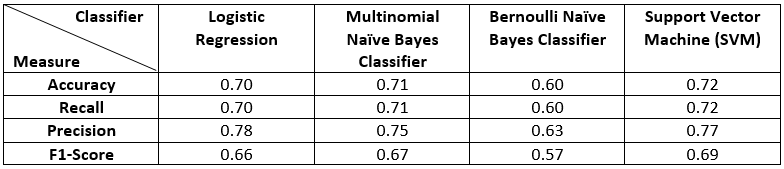

Among the three classifiers, SVM gave the best results, giving the highest scores for accuracy, recall and f1-score. The Logistic Regression classifier gave the highest precision.  

## **Trigrams**

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size = 0.20, random_state = 0)

In [ ]:
print(X2_train)

  (0, 34322)	0.21320071635561047
  (0, 33722)	0.21320071635561047
  (0, 33631)	0.21320071635561047
  (0, 33630)	0.21320071635561047
  (0, 32025)	0.21320071635561047
  (0, 31710)	0.21320071635561047
  (0, 31123)	0.21320071635561047
  (0, 29808)	0.21320071635561047
  (0, 25622)	0.21320071635561047
  (0, 22113)	0.21320071635561047
  (0, 17779)	0.21320071635561047
  (0, 14027)	0.21320071635561047
  (0, 12841)	0.21320071635561047
  (0, 12289)	0.21320071635561047
  (0, 4917)	0.21320071635561047
  (0, 4556)	0.21320071635561047
  (0, 3510)	0.21320071635561047
  (0, 3015)	0.21320071635561047
  (0, 2085)	0.21320071635561047
  (0, 1330)	0.21320071635561047
  (0, 1291)	0.21320071635561047
  (0, 1153)	0.21320071635561047
  (1, 27246)	0.2773500981126145
  (1, 23911)	0.2773500981126145
  (1, 22361)	0.2773500981126145
  :	:
  (2989, 30215)	0.23963077373728775
  (2989, 25015)	0.23963077373728775
  (2989, 24056)	0.14998132914609413
  (2989, 23880)	0.23963077373728775
  (2989, 22367)	0.23963077373728775


### Logistic Regression

In [ ]:
LR2 = LogisticRegression()
LR2.fit(X2_train, Y2_train)

LogisticRegression()

In [ ]:
Y2_pred = LR2.predict(X2_test)

In [ ]:
print(accuracy_score(Y2_test,Y2_pred))

0.6742323097463284


In [ ]:
print(classification_report(Y2_test,Y2_pred))

              precision    recall  f1-score   support

          -1       1.00      0.49      0.66       142
           0       0.94      0.21      0.34       215
           1       0.62      0.99      0.76       392

    accuracy                           0.67       749
   macro avg       0.85      0.57      0.59       749
weighted avg       0.78      0.67      0.62       749



### Bernoulli Naive Bayes

In [ ]:
BNB2 = BernoulliNB()
BNB2.fit(X2_train, Y2_train)

BernoulliNB()

In [ ]:
Y2_pred1 = BNB2.predict(X2_test)

In [ ]:
print(accuracy_score(Y2_test,Y2_pred1))

0.5887850467289719


In [ ]:
print(classification_report(Y2_test,Y2_pred1))

              precision    recall  f1-score   support

          -1       1.00      0.37      0.54       142
           0       0.41      0.19      0.26       215
           1       0.58      0.89      0.70       392

    accuracy                           0.59       749
   macro avg       0.67      0.48      0.50       749
weighted avg       0.61      0.59      0.54       749



### Multinomial Naive Bayes

In [ ]:
MNB2 = MultinomialNB()
MNB2.fit(X2_train, Y2_train)

MultinomialNB()

In [ ]:
Y2_pred2 =   MNB2.predict(X2_test)

In [ ]:
print(accuracy_score(Y2_test,Y2_pred2))

0.6915887850467289


In [ ]:
print(classification_report(Y2_test,Y2_pred2))

              precision    recall  f1-score   support

          -1       1.00      0.60      0.75       142
           0       0.82      0.23      0.36       215
           1       0.64      0.98      0.77       392

    accuracy                           0.69       749
   macro avg       0.82      0.60      0.63       749
weighted avg       0.76      0.69      0.65       749



### Support Vector Machine

In [ ]:
SVM2 = SVC(kernel='linear')
SVM2.fit(X2_train, Y2_train)

SVC(kernel='linear')

In [ ]:
Y2_pred3 =   SVM2.predict(X2_test)

In [ ]:
print(accuracy_score(Y2_test,Y2_pred3))

0.6955941255006676


In [ ]:
print(classification_report(Y2_test,Y2_pred3))

              precision    recall  f1-score   support

          -1       1.00      0.57      0.73       142
           0       0.91      0.24      0.38       215
           1       0.64      0.99      0.77       392

    accuracy                           0.70       749
   macro avg       0.85      0.60      0.63       749
weighted avg       0.78      0.70      0.65       749



The results achieved by these classifiers with trigrams as a feature are as follows:

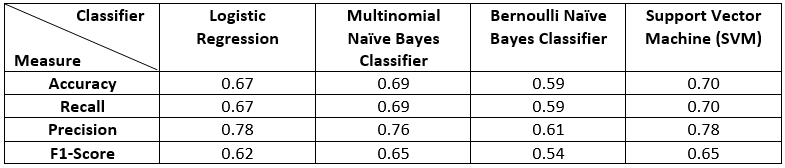

Among the three classifiers, SVM gave the best results, giving the highest scores for accuracy and recall. The Logistic Regression and SVM classifiers gave the highest precision. The Multinomial Naïve Bayes and SVM classifiers gave the highest f1-score.   





> From the above experiments, the following observations can be made:


1.   Support Vector Machine has the highest precision and recall amongst all the classifiers. 
2.   For all the classifiers, the range of scores for each evaluation measure decreased from unigrams to trigrams.
3.   The highest accuracy achieved for sentiment analysis using this dataset is 83%, where the classifier used is Support Vector Machine with unigrams.






# **Data Visualization**

### **WordClouds**

Word clouds are graphical representations of word frequency which display words that appear more frequently in tweets. In this section we have represented four such diagrams, which helps to identify the most popular words affecting each sentiment. 

Expo2020 and Expo2020 Dubai are the two most popular words appearing in all the sentiments. However, in negative analysis it was observed that Russia and Ukraine were the other two words which had greater occurence compared to the latter. This is due to the ongoing Russia-Ukraine conflict. 

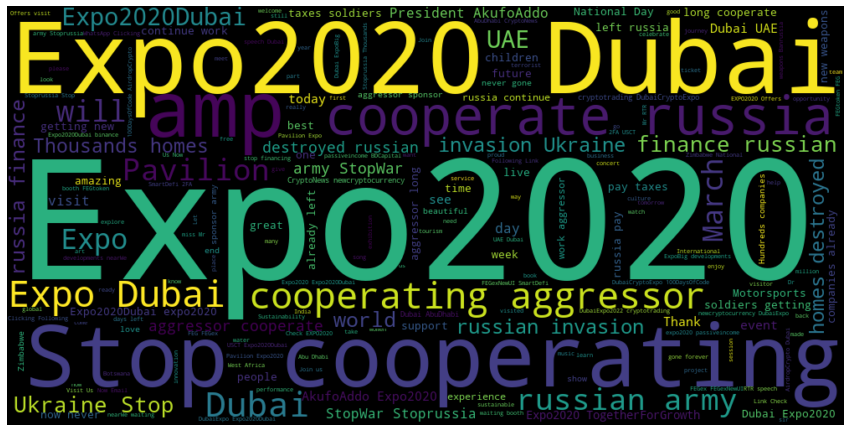

In [ ]:
#Plotting WordCloud for all the tweets extracted.
plt.figure(figsize=(15,15))
allWords = ''.join([twts for twts in vader_df['Tweets']])
wordCloud = WordCloud(background_color = 'black', width = 1000, height = 500, random_state = 21, max_font_size = 200).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

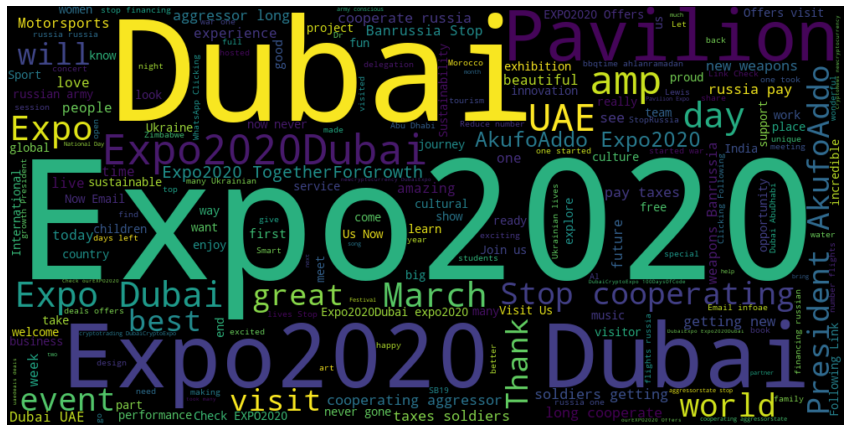

In [ ]:
#Plotting WordCloud for positive analysis
plt.figure(figsize=(15,15))
posWords = ''.join([twts for twts in positiveDF['Tweets']])
wordCloud = WordCloud(background_color = 'black', width = 1000, height = 500, random_state = 21, max_font_size = 200).generate(posWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

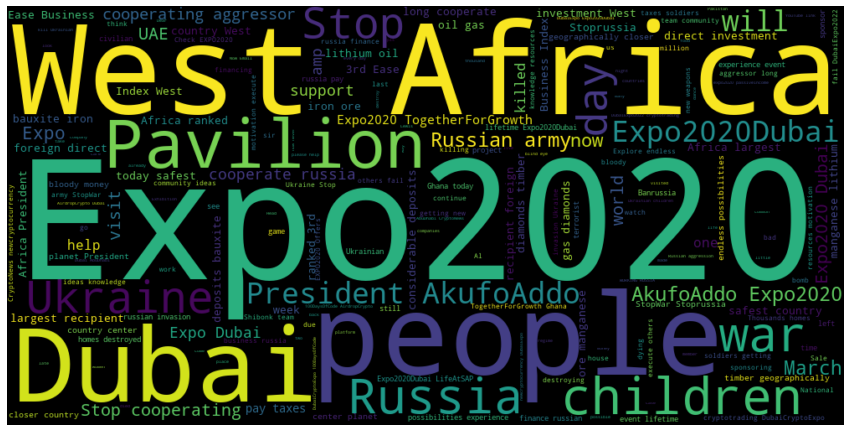

In [ ]:
#Plotting WordCloud for negative analysis.
plt.figure(figsize=(15,15))
negWords = ''.join([twts for twts in negativeDF['Tweets']])
wordCloud = WordCloud(background_color = 'black', width = 1000, height = 500, random_state = 21, max_font_size = 200).generate(negWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

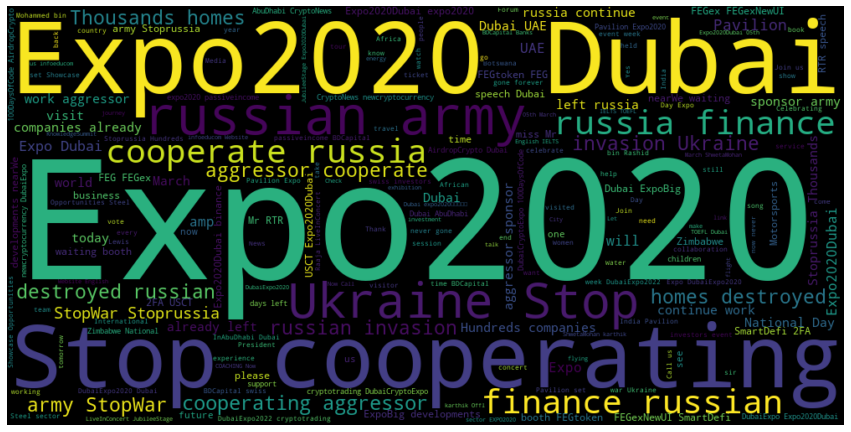

In [ ]:
#Plotting WordCloud for Neutral analysis.
plt.figure(figsize=(15,15))
negWords = ''.join([twts for twts in neutralDF['Tweets']])
wordCloud = WordCloud(background_color = 'black', width = 1000, height = 500, random_state = 21, max_font_size = 200).generate(negWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## **Scatterplot**

The scatterplot depicted below helps us to gain insights and feedback of different users all around the world regarding the topic Expo2020. From the graph, it has been observed that most users had positive or neutral feedback as most of the datapoints are plotted on the right-side of the graph. These datapoints are plotted based on two main metrics that categorize tweets into different sentiments: Subjectivity and Polarity.

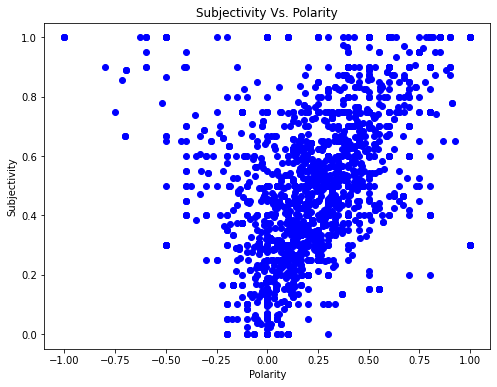

In [ ]:
#Scatterplot representing Polarity v/s Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, Df.shape[0]):
  plt.scatter(Df['Polarity'][i], Df['Subjectivity'][i], color='Blue')

plt.title('Subjectivity Vs. Polarity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## **Bar Graph**

From the graph given below we observe that the number of positive sentiments is greater compared to the negative and neutral sentiments. This implies that, most users have a positive view regarding the Expo2020 Events hosted in Dubai, UAE.

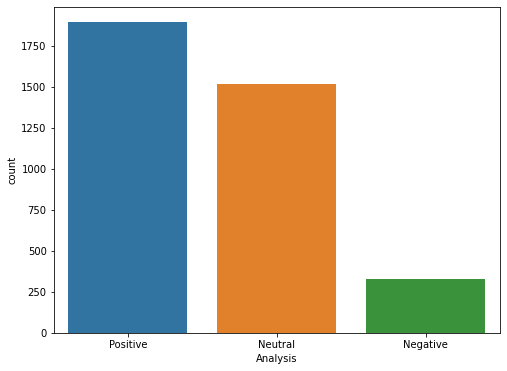

In [ ]:
#Plotting bar graph for analysis column in the dataframe.
plt.figure(figsize=(8,6))
sns.countplot(data= Df, x='Analysis',order= Df['Analysis'].value_counts().index)
plt.show()

## **Pie Chart**

The pie chart given below represents the percentage of each sentimental analysis. It has been observed that more than half of the analysis is Positive, whereas very less amount of tweets have a negative response regarding the Expo2020 Dubai. From the chart, we can also infer that around 28% of the sentiments are neutral. This can be due to the fact that most users use Expo2020 as a hashtag for the recent local news. 

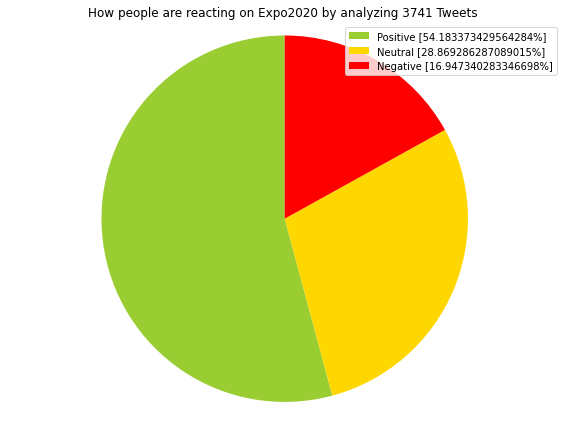

In [ ]:
#Function to calculate the percentage of each sentiment 
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Calculating the count of positive, negative, neutral and total sentiments.
pos = vader_df.Vader_Analysis.value_counts().Positive
neu = vader_df.Vader_Analysis.value_counts().Neutral
neg = vader_df.Vader_Analysis.value_counts().Negative
total = pos + neu + neg

#Calculating the percentage for each sentiment by passing in arguments in the above function.
pos_perc = percentage(pos, total)
neu_perc = percentage(neu, total)
neg_perc = percentage(neg, total)
labels = ['Positive ['+str(pos_perc)+'%]', 
          'Neutral ['+str(neu_perc)+'%]', 
          'Negative ['+str(neg_perc)+'%]']

#Plotting the pie chart
plt.figure(figsize=(8,6))
sizes = [pos_perc, neu_perc, neg_perc]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('How people are reacting on Expo2020 by analyzing '
          + str(total)+' Tweets ')
plt.axis('equal')
plt.tight_layout()
plt.show()

## **Word Frequency Plot**

The Word Frequency Graph helps us to identify the most occuring words from the tweets. From the graphs depicted below, it has been observed that expo2020 is the most frequently used word for the whole text, neutral, negative and positive sentiments. In negative analysis, we can infer that words such as Russia, Ukraine, kill have been used very often.

In [ ]:
#Calculating the number of characters and words in each tweet for frequency plot.
Df['CharNumber'] = Df.Tweets.apply(len)  
Df['WordsNumber'] = Df.Tweets.apply(lambda sent: len(sent.split())) 
Df.head()

,index,Tweets,Likes,Date and Time,Subjectivity,Polarity,Analysis,Compound,Positive,Negative,Neutral,Vader_Analysis,Clean Tweets,Labeled_Analysis,CharNumber,WordsNumber
0,0,Piano concert afloat in the air Wow Opportunit...,0,2022-03-14 09:51:08,0.550000,0.050000,Positive,0.5859,0.322,0.000,0.678,Positive,piano concert afloat air wow opportunitypavili...,1,70,9
1,1,Search no further than Opportunity Pavilion to...,6,2022-03-13 09:30:00,0.833333,0.450000,Positive,0.6705,0.259,0.085,0.656,Positive,search opportun pavilion see beauti piano conc...,1,146,21
2,2,‘Expo 2020 Dubai Shaping the Future’ is a docu...,0,2022-03-07 10:25:01,0.239583,0.141667,Positive,0.4939,0.094,0.000,0.906,Positive,‘ expo 2020 dubai shape futur ’ documentari co...,1,235,33
3,3,Have you ridden on the world’s largest passeng...,1,2022-03-13 11:15:00,0.666667,0.000000,Neutral,0.0000,0.000,0.000,1.000,Neutral,have ride world ’ largest passeng lift mobil p...,0,222,39
4,4,Did you know that Mobility Pavilion is named A...,3,2022-03-13 08:30:00,0.454545,0.136364,Positive,0.4215,0.104,0.000,0.896,Positive,do know mobil pavilion name alif 1st letter ar...,1,172,25


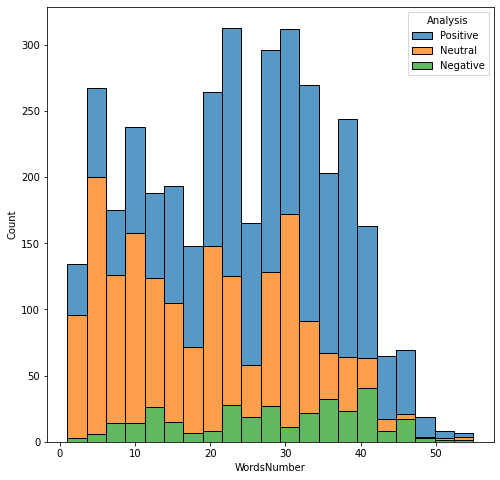

In [ ]:
#Plotting histogram for the frequency of each word with respect to each sentiment.
plt.figure(figsize=(8,8))
sns.histplot(data = Df, x='WordsNumber',
             hue='Analysis', multiple='stack')
plt.show()

In [ ]:
#Displaying the top 10 frequently used words in Clean tweets
words = [word for sent in Df['Clean Tweets'] for word in sent.split()]
words[:10] 

['piano',
 'concert',
 'afloat',
 'air',
 'wow',
 'opportunitypavilion',
 'expo2020dubai',
 'search',
 'opportun',
 'pavilion']

In [ ]:
#Displaying the dataframe denoting the frequent words present in the tweets along with its count in descending order.
freqwords = Counter(words)
freqwords_sorted = sorted(
    freqwords.items(), key=lambda pair: pair[1], reverse=True)
freqwords_df = pd.DataFrame(freqwords_sorted[:20], columns=['word', 'counts'])
freqwords_df.head(10)

,word,counts
0,expo2020,1606
1,dubai,1283
2,’,579
3,expo,574
4,expo2020dubai,552
5,cooper,511
6,russia,473
7,pavilion,414
8,stop,401
9,uae,387


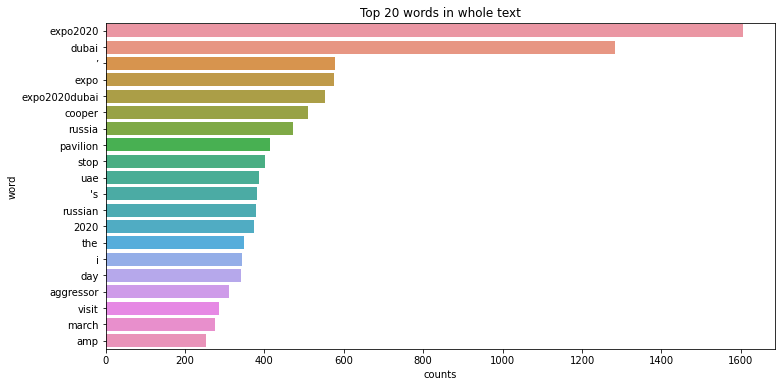

In [ ]:
#Plotting graph for the top 20 words from the entire set of tweets
plt.figure(figsize=(12, 6))
sns.barplot(data=freqwords_df, x='counts', y='word')
plt.title('Top 20 words in whole text')
plt.show()

In [ ]:
#Function which helps to identify the most frequent words for each sentimental analysis
def freq_sentiment_words(tweets, analysis, num):
    words = [word for sent in tweets[tweets['Analysis'] == analysis]
             ['Clean Tweets'] for word in sent.split()]
    freqwords = Counter(words)
    freq_words_sorted = sorted(freqwords.items(), key=lambda pair: pair[1], reverse=True)
    freqwords_df = pd.DataFrame(freq_words_sorted[:num], columns=['Words', 'Count'])
    return freqwords_df

#Plotting the graph for the above function.
def plot_freq(data, st):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Count', y='Words')
    plt.title(f'Top 20 words in {st} Analysis')
    plt.show()

           Words  Count
0       expo2020    929
1          dubai    700
2              ’    362
3           expo    332
4  expo2020dubai    252


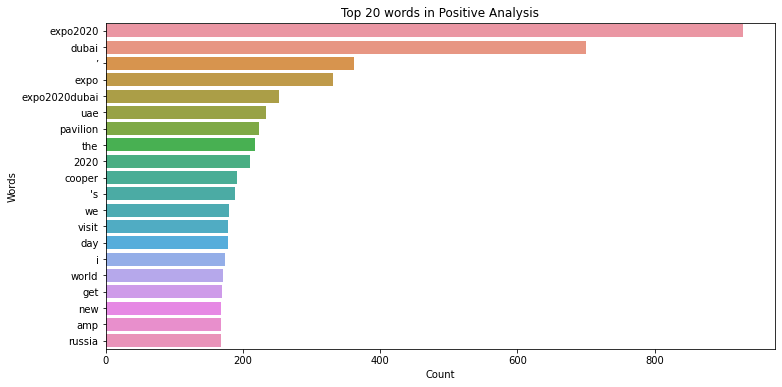

In [ ]:
#Displaying the dataframe and graph denoting the frequent words present in the tweets having positive sentiment along with its count.
PositiveWords = freq_sentiment_words(Df, 'Positive', 20)
print(PositiveWords.head())
plot_freq(PositiveWords, 'Positive')

      Words  Count
0  expo2020    117
1     dubai     77
2    russia     72
3         ’     55
4         i     55


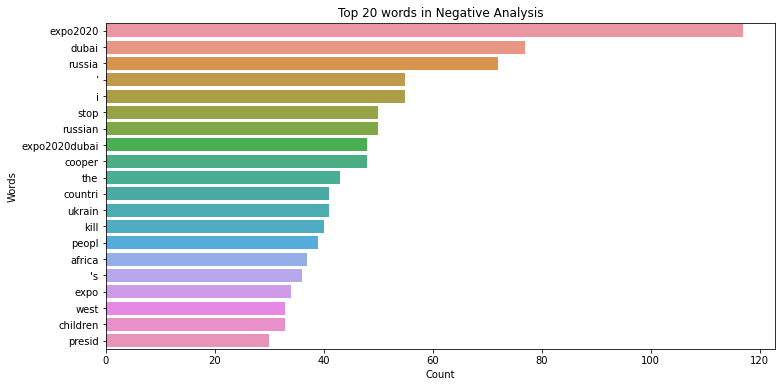

In [ ]:
#Displaying the dataframe and graph denoting the frequent words present in the tweets having negative sentiment along with its count.
NegativeWords = freq_sentiment_words(Df, 'Negative', 20)
print(NegativeWords.head())
plot_freq(NegativeWords, 'Negative')

           Words  Count
0       expo2020    560
1          dubai    506
2        russian    277
3         cooper    272
4  expo2020dubai    252


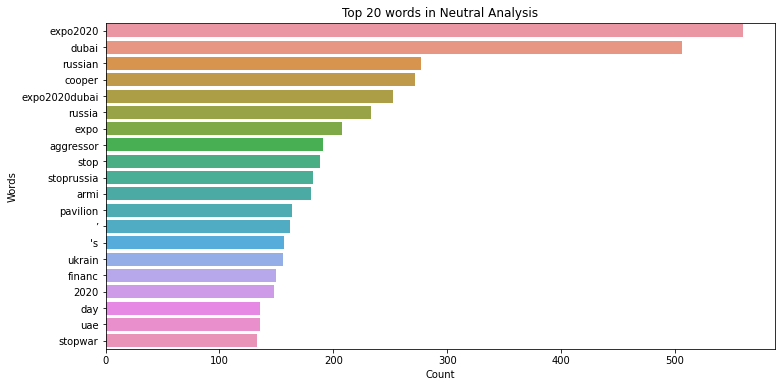

In [ ]:
#Displaying the dataframe and graph denoting the frequent words present in the tweets having neutral sentiment along with its count.
NeutralWords = freq_sentiment_words(Df, 'Neutral', 20)
print(NeutralWords.head())
plot_freq(NeutralWords, 'Neutral')

## **PyLDAvis**
PyLDAvis is a Python library that assists users in deciphering the themes in a topic model that has been fitted to a corpus of text data. The software uses data from a fitted LDA topic model to create a web-based interactive representation. 

We used the count vectorized tweets to generate an LDA Model, which was then used for topic modeling and visualized using PyLDAvis. The words in the tweets were divided down into three topic components, resulting in the following analysis:

*Topic* *1*:
The most important terms in this topic are expo2020, pavilion, visit, world, march and so on. The words that are mostly positive and related to the expo2020 events are placed in this topic.

*Topic* *2*:
The most important terms in this article are expo2020, dubai, president, togetherforgrowth, Africa, best, opportunities, business and so on. The terms that are potentially neutral or related to the current affairs are placed in this topic.

*Topic* *3*:
The most important terms in this issue are russia, aggressor, stop, stopwar, invasion, destroyed, ukraine and so on. The words that are negative or which has a bad impact can be found in this topic.

In [ ]:
#CounterVectorizing the tweets available in the dataframe
vectorizer_ = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True)
vectorized_tweets = vectorizer_.fit_transform(Df['Tweets'])

In [ ]:
#Generating LDA model
LDA = LatentDirichletAllocation(n_components= 3, max_iter=10, learning_method='online',verbose=True)
tweets_LDA = LDA.fit_transform(vectorized_tweets)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
#Displaying the dashboard
pyLDAvis.enable_notebook()
dash_board = pyLDAvis.sklearn.prepare(LDA, vectorized_tweets, vectorizer_, mds='tsne')
dash_board

PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
2     -1015.700562  1338.981201       1        1  46.057203
1      -387.996002  -373.316162       2        1  28.763526
0     -2184.745605   -60.565800       3        1  25.179271, topic_info=             Term        Freq       Total Category  logprob  loglift
1339       russia  514.000000  514.000000  Default  30.0000  30.0000
1485         stop  462.000000  462.000000  Default  29.0000  29.0000
1340      russian  459.000000  459.000000  Default  28.0000  28.0000
94      aggressor  362.000000  362.000000  Default  27.0000  27.0000
350   cooperating  313.000000  313.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
590     financing   41.917626   42.631019   Topic3  -5.4720   1.3623
488         email   42.178543   42.900315   Topic3  -5.4658   1.3622
1731         work   91.760756   96.758503   Topic3  -4.6885   1.3261
282      children   89.793762   94.605963   Topic3  -4.7102   1.3269
1062          new  111.690684  177.216310   Topic3  -4.4920   0.9175

[169 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
10        1  0.177542        12
10        2  0.807009        12
16        1  0.989156        16
32        1  0.965192      2020
32        2  0.034066      2020
...     ...       ...       ...
1731      3  0.950821      work
1735      1  0.683206     world
1735      2  0.272444     world
1735      3  0.046106     world
1754      1  0.997350  zimbabwe

[196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

# **Discussion and Conclusion**

In this coursework, we start by using an API called Tweepy to extract tweets from Twitter. These tweets are related to 'Expo 2020' and its ongoing events. Initially, we extracted around 500 tweets. To ensure better accuracy and performance, we extracted 4,019 tweets.

The aim of this coursework is to analyze sentiments based on tweets posted.

Extracted tweets were converted into a dataframe of raw data, which was further cleaned to reduce data redundancy.

Furthermore, TextBlob and VADER techniques, provided by NLTK was used to label our data. TextBlob provided us with the subjectivity and Polarity of each tweet. On the other hand, VADER provided scores based on positive, negative or neutral sentiments only. 

The tweets in the dataframe were also pre-processed using the following methods: Tokenization, Removal of Stop Words, Stemming, and Lemmatization. 

The pre-processed dataset was then passed through a TF-IDF vectorizer to convert the tweets into a vector form. The vectorized tweets were used as an input feature to train our classifiers. Whereas, the analysis labels retrieved from VADER was used as an output label to train and test our model. 

Feature representation using n-grams was also performed to display the most frequently occuring words in different n-grams.

Furthermore, our data was split into training and testing sets, in the ratio 80:20. After which, three different classifiers were implemented, namely Logistic Regression, SVM and Naive Bayes. We implemented two algorithms of the Naive Bayes method, i.e. MultinomialNB() and BinomialNB(). 

The performance of these classifiers was compared based on precision and recall. It was observed that the SVM classifier with unigram features has the best performance. 
It was also observed that the accuracy of the classifier decreases with more n-grams. 

In order to gain insights from our dataset and classifiers implemented, we also created different visualizations such as WordClouds, pie charts, and pyLDAvis. We were able to analyze that, about 54.18% feel positively about Expo 2020, 28.87% have neutral sentiments, and 16.95% people feel negatively about Expo 2020. 

We can also see from the Word Clouds, while tweeting majority people tend to use words like 'love', 'best', 'great', and 'beautiful', to describe their experience at Expo2020. 

These insights could help understanding the sentiments of visitors that have visited Expo 2020 in Dubai, how their experiences could be improved and what can be done to attract more tourits to visit the Expo.

Kharde, Vishal & Sonawane, Sheetal. (2016). Sentiment Analysis of Twitter Data: A Survey of Techniques. International Journal of Computer Applications. 139. 5-15. 10.5120/ijca2016908625. 
In this research paper, a sentiment analysis was performed on a dataset of tweets using three different classifiers - Naive Bayes, Maximum Entropy and Support Vector Machine. The features 
used for these classifications were term presence and frequency, part of speech information, negations, and opinion words and phrases. The research had concluded that SVM and Naive Bayes
could be regarded as baseline machine learning techniques for sentiment analysis due to the resulting high accurcaies. A lexicon-baesd approach was also included for analysis, which led to 
an increase in accuracy.

Bagheri, H., & Islam, M.J. (2017). Sentiment analysis of twitter data. ArXiv, abs/1711.10377.
This research paper used Tweepy for extracting tweets from Twitter and TextBlob for text processing, analysing & classifiying the extracted tweets.

# **References**

[1] Kaggle.com. 2022. Better_Tweet_Sentiment_Analysis. [online] Available at: <https://www.kaggle.com/himanshubhavnani/better-tweet-sentiment-analysis> [Accessed 15 March 2022].

[2] Kaggle.com. 2022. Twitter Sentiment Analysis. [online] Available at: <https://www.kaggle.com/pushpumkrishna/twitter-sentiment-analysis/notebook> [Accessed 15 March 2022].

[3] Kaggle.com. 2022. Sentiment Analysis on twitter dataset | NLP. [online] Available at: <https://www.kaggle.com/piyushagni5/sentiment-analysis-on-twitter-dataset-nlp> [Accessed 15 March 2022].

[4] Kaggle.com. 2022. Twitter Sentiment Analysis. [online] Available at: <https://www.kaggle.com/orjiugochukwu/twitter-sentiment-analysis> [Accessed 15 March 2022].